<a href="https://colab.research.google.com/github/rishikaranjan/NLP/blob/main/NLP_Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Libs**

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [3]:
dataset = pd.read_csv('emails.csv')

In [87]:
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [9]:
dataset.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [11]:
ham = dataset[dataset['spam'] == 0]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam = dataset[dataset['spam'] == 1]

In [14]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


**Percentage of Spam and ham Emails**

In [15]:
print('spam percentage =' , (len(spam)/len(dataset))*100 , '%')

spam percentage = 23.88268156424581 %


In [17]:
print('ham percentage =' , (len(ham)/len(dataset))*100 , '%')

ham percentage = 76.11731843575419 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


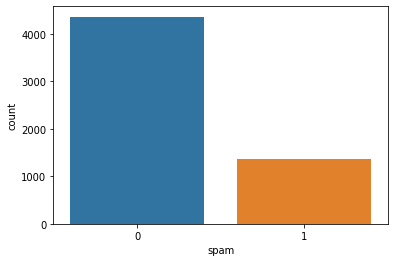

In [18]:
sns.countplot(dataset['spam'] , label = 'count spam vs ham')

**Convert email message into binary code **

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

spamham_countvectorizer = vectorizer.fit_transform(dataset['text'])

In [55]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
spamham_countvectorizer.shape

(5728, 37303)

**Training the model**

In [57]:
label = dataset['spam'].values

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

NB_classifier.fit(spamham_countvectorizer , label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
testing_sample = ['Goodmornig maam , my name is Rishika Ranjan , I would like to get information regarding marks' , 'money heist']

In [68]:
testing_sample_countvectorizer = vectorizer.transform(testing_sample)

test_predict = NB_classifier.predict(testing_sample_countvectorizer)

test_predict

array([0, 1])

In [ ]:
# this shows that first one is genuine and second is not

In [69]:
x = spamham_countvectorizer
y = label

In [70]:
x.shape

(5728, 37303)

In [71]:
y.shape

(5728,)

**Dividing data into training and test set**

In [72]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [75]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Evaluating Model**

In [76]:
from sklearn.metrics import classification_report , confusion_matrix

In [78]:
y_predict_train = NB_classifier.predict(x_train)

y_predict_train

array([0, 0, 0, ..., 0, 1, 0])

In [79]:
cm = confusion_matrix(y_train , y_predict_train)

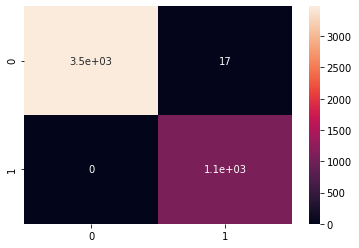

In [80]:
sns.heatmap(cm , annot = True)

In [81]:
y_predict_test = NB_classifier.predict(x_test)

y_predict_test

array([1, 0, 1, ..., 0, 0, 0])

In [82]:
cm = confusion_matrix(y_test , y_predict_test)

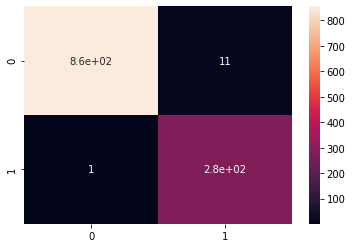

In [84]:
sns.heatmap(cm , annot = True)

In [ ]:
# only misclassified 1 + 11 = 12 data

In [85]:
print(classification_report(y_test , y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       866
           1       0.96      1.00      0.98       280

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

